<a href="https://colab.research.google.com/github/redwankarimsony/yolov5_18class/blob/main/YOLO_v5_(Class_18_Size_640)_Dhaka_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#check gpu model
from tensorflow.python.client import device_lib
device_lib.list_local_devices()[3]

name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15695549568
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12866946449917871220
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"

Check for GPU Specifications: 

|Processor|	SMs	|CUDA Cores|Tensor Cores|Frequency|	double-single-half |Max. Memory | MemoryB/W|
|:--|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|Nvidia V100 PCIe (Volta) |	80|	5,120|	640|1.53 GHz |	7 - 14 - 112	|	16 GB|	900 GB/s|
|Nvidia P100 PCIe (Pascal)|	56|	3,584|	N/A|1.12 GHz|	4.7 - 9.3 - 18.7|	16 GB|	720 GB/s|
|Tesla T4 PCIe (Turing)   | 40|	2560 |	320|1.59 GHz |	0.256  - 8.141 - 65.13|	16 GB|	320 GB/s|

In [36]:
!pip install -U PyYAML
from IPython.display import clear_output
clear_output()

In [3]:
# # copy old code repository
# !rm -r /content/sample_data/
# !cp '/content/drive/My Drive/Dhaka-ai/yolov5_1.zip' .
# !unzip yolov5_1.zip ; rm yolov5_1.zip
# clear_output()

# Data Reload


In [ ]:
 %cd /content/yolov5/data/
 !rm -r *
 !gdown --id 1udoHxPdIES7eNMXavp2vmbNF8LhfKhd8 # link to my data

 !unzip dhaka-traffic-yolo-v5_18_class_640.zip; 
 !rm dhaka-traffic-yolo-v5_18_class_640.zip
 clear_output()


In [39]:
%cd /content/yolov5/
!python train.py --epochs 200\
                 --batch  32\
                 --data ./data/traffic.yaml \
                 --cfg ./models/yolov5m.yaml \
                 --device 0

/content/yolov5
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
{'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.58, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.014, 'hsv_s': 0.68, 'hsv_v': 0.36, 'degrees': 0.0, 'translate': 0.0, 'scale': 0.5, 'shear': 0.0}
Namespace(adam=False, batch_size=32, bucket='', cache_images=False, cfg='././models/yolov5m.yaml', data='././data/traffic.yaml', device='0', epochs=200, evolve=False, img_size=[640, 640], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-10-13 07:44:48.975846: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6

## <font color="red">GPU Log:</font> 

|GPU NAME | Memory | Model Size |Compute Power| Batch Size | Train Steps | Valid Steps | Train Time| Valid Time|
|---|---|---|:-:|:-:|:-:|:-:|:-:|:-:|
|Tesla P100|16 GB   | Medium | 6.0 |32 | 300 | 75 | 03:35 | 00:24 |




GPU Specifications: 

|Processor|	SMs	|CUDA Cores|Tensor Cores|Frequency|	double-single-half |Max. Memory | MemoryB/W|
|:--|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|Nvidia V100 PCIe (Volta) |	80|	5,120|	640|1.53 GHz |	7 - 14 - 112	|	16 GB|	900 GB/s|
|Nvidia P100 PCIe (Pascal)|	56|	3,584|	N/A|1.12 GHz|	4.7 - 9.3 - 18.7|	16 GB|	720 GB/s|
|Tesla T4 PCIe (Turing)   | 40|	2560 |	320|1.59 GHz |	0.256  - 8.141 - 65.13|	16 GB|	320 GB/s|




## <font color="red">Submission LB Log:</font> 

|After Epochs | Model|Version|threshold |Object Count|Score | 
|---|---|---|---|:-:|---|
|10 | Medium | yolov5.zip    | 0.1 |     | 0.0072|
|20 | Medium | yolov5_2.zip  | 0.2 |     | 0.0115|
|50 | Medium | yolov5_3.zip  | 0.3 |     | 0.0167|
|85 | Medium | yolov5_4.zip  | 0.5 | 2086 |   _   |
|130 | Medium | yolov5_upto_130.zip  | 0.5 | 2340 |   _   |

/content/yolov5


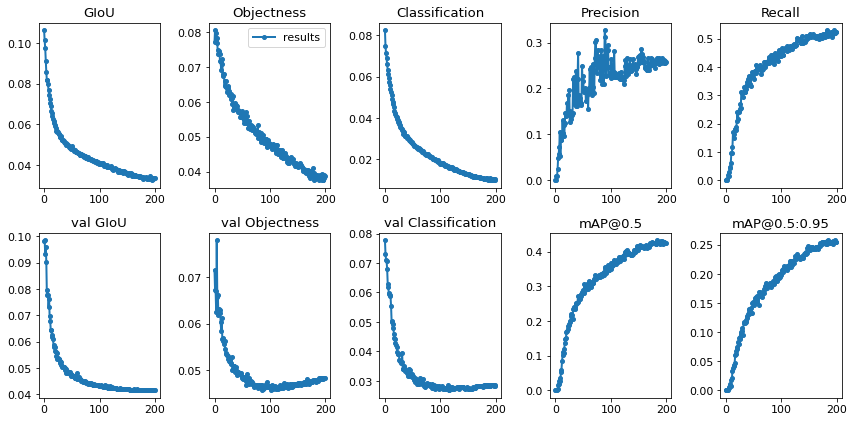

In [40]:
%cd /content/yolov5/
from utils.utils import plot_results; 
plot_results()

In [ ]:
!python detect.py -h

usage: detect.py [-h] [--weights WEIGHTS] [--source SOURCE] [--output OUTPUT]
                 [--img-size IMG_SIZE] [--conf-thres CONF_THRES]
                 [--iou-thres IOU_THRES] [--fourcc FOURCC] [--half]
                 [--device DEVICE] [--view-img] [--save-txt]
                 [--classes CLASSES [CLASSES ...]] [--agnostic-nms]
                 [--augment]

optional arguments:
  -h, --help            show this help message and exit
  --weights WEIGHTS     model.pt path
  --source SOURCE       source
  --output OUTPUT       output folder
  --img-size IMG_SIZE   inference size (pixels)
  --conf-thres CONF_THRES
                        object confidence threshold
  --iou-thres IOU_THRES
                        IOU threshold for NMS
  --fourcc FOURCC       output video codec (verify ffmpeg support)
  --half                half precision FP16 inference
  --device DEVICE       cuda device, i.e. 0 or 0,1,2,3 or cpu
  --view-img            display results
  --save-txt            save

In [62]:
%cd /content/yolov5
!python test.py -h

/content/yolov5
usage: test.py [-h] [--weights WEIGHTS] [--data DATA]
               [--batch-size BATCH_SIZE] [--img-size IMG_SIZE]
               [--conf-thres CONF_THRES] [--iou-thres IOU_THRES] [--save-json]
               [--task TASK] [--device DEVICE] [--single-cls] [--augment]
               [--verbose]

optional arguments:
  -h, --help            show this help message and exit
  --weights WEIGHTS     model.pt path
  --data DATA           *.data path
  --batch-size BATCH_SIZE
                        size of each image batch
  --img-size IMG_SIZE   inference size (pixels)
  --conf-thres CONF_THRES
                        object confidence threshold
  --iou-thres IOU_THRES
                        IOU threshold for NMS
  --save-json           save a cocoapi-compatible JSON results file
  --task TASK           'val', 'test', 'study'
  --device DEVICE       cuda device, i.e. 0 or 0,1,2,3 or cpu
  --single-cls          treat as single-class dataset
  --augment             augmented 

In [90]:
%cd /content/yolov5/
!python test.py --weights weights/best.pt --data data/traffic.yaml \
                --img-size 1024 --conf-thres 0.3 --iou-thres 0.75 \
                --batch-size 8

/content/yolov5
Namespace(augment=False, batch_size=8, conf_thres=0.3, data='./data/traffic.yaml', device='', img_size=1024, iou_thres=0.75, save_json=False, single_cls=False, task='val', verbose=False, weights='weights/best.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 237 layers, 2.17992e+07 parameters, 0 gradients
Caching labels /content/yolov5/data/valid.txt (600 found, 0 missing, 0 empty, 0 duplicate, for 600 images): 100% 600/600 [00:00<00:00, 9122.78it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95:   0% 0/75 [00:00<?, ?it/s]test.py:148: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  ti = (cls == tcls_tensor).nonzero().view(-1)  # prediction indices
               Class      Images     

In [92]:
%cd /content/yolov5
!rm -r output_dir
!python detect.py --source data/test/ \
                  --output output_dir --img-size 1024  --weights weights/best.pt \
                  --save-txt --conf 0.25  --iou-thres 0.75 \
                  --augment

/content/yolov5
Namespace(agnostic_nms=False, augment=True, classes=None, conf_thres=0.25, device='', fourcc='mp4v', half=False, img_size=1024, iou_thres=0.75, output='output_dir', save_txt=True, source='data/test/', view_img=False, weights='weights/best.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

image 1/500 data/test/Asraf_50_jpg.rf.7026694f0b9f37a6790982295c7e8663.jpg: 1024x1024 3 buss, 3 cars, 1 minivans, 6 motorbikes, 2 pickups, 1 trucks, Done. (0.070s)
image 2/500 data/test/Asraf_51_jpg.rf.0e3516baf7509bc2c4a4aa8deea494c2.jpg: 1024x1024 9 buss, 12 cars, 3 minivans, 5 motorbikes, 1 pickups, 4 suvs, 1 vans, Done. (0.071s)
image 3/500 data/test/Asraf_52_jpg.rf.867869f276e6db3a09a84b99643df316.jpg: 1024x1024 2 buss, 2 cars, 1 minivans, 8 motorbikes, 9 pickups, 1 vans, Done. (0.066s)
image 4/500 data/test/Sabiha_(01)_jpg.rf.f935c7fc51a14c64e34c17a17c41cb1f.jpg: 1024x1024 6 buss, 9 cars, 1 minivans, 1 motorbikes, 2 pickups, 1 suvs, 

# Submission file generation

In [93]:
import pandas as pd

%cd /content/yolov5/output_dir

output_dir = '/content/yolov5/output_dir/'

label_names = ['ambulance', 'bicycle', 'bus', 'car', 'human hauler', 'minibus', 
               'minivan', 'motorbike', 'pickup', 'policecar', 'rickshaw', 'scooter', 
               'suv', 'taxi', 'three wheelers (CNG)', 'truck', 'van', 'wheelbarrow']


image_height = 1024
image_width = 1024
from os import listdir
 
def list_files(directory, extension):
    return [f for f in listdir(directory) if f.endswith('.' + extension)]

file_list_txt = list_files(output_dir, 'txt')




image_id, scores, labels_value, xmin, ymin, xmax, ymax = [], [], [], [], [], [], []

for file_ in file_list_txt:
    with open(file_) as f:
        for line in f:
            image_id.append(file_[:-3] + 'jpg')
            labels_value.append(label_names[int(line.split(' ')[0])])

            others = line.split(' ')[1:6]
            [score, x_center, y_center, width, height] = [float(i) for i in others]

            print(x_center, y_center, width, height)
            scores.append(score)
            xmin.append(int((x_center - height/2.0)*image_height))
            xmax.append(int((x_center + height/2.0)*image_height))
            ymin.append(int((y_center - width/2.0)*image_width))
            ymax.append(int((y_center + width/2.0)*image_width))

result = pd.DataFrame({'image_id': image_id,
                       'class': labels_value,
                       'score': scores,
                       'xmin': xmin,
                       'ymin': ymin,
                       'xmax': xmax,
                       'ymax': ymax
                       })
result['width'] = 1024
result['height'] = 1024

result.tail(30)

%cd /content/yolov5/

# Saving the submission file with timestamp
import datetime
now = datetime.datetime.now()
timestamp = now.strftime("%Y-%m-%d %H:%M:%S")

clear_output()
result.to_csv(f'{timestamp} submission_{result.shape[0]}.csv', index=False)
print('Submission file is written Successfully!!\n\n Sneak Peak at Submission File :)')
print(f'Total Objects Found: {result.shape[0]}')


Submission file is written Successfully!!

 Sneak Peak at Submission File :)
Total Objects Found: 8009


# Saving work in Drive

In [94]:
%cd /content/
!zip -r yolov5_18class.zip yolov5 
clear_output()
!mv yolov5_18class.zip '/content/drive/My Drive/Dhaka-ai'

In [43]:
import pandas as pd
import numpy as np

In [44]:

def plot_result_csv(filename):
    result = pd.read_csv(filename)
    class_mean = result.groupby(['class']).mean()['score'].reset_index().copy()
    class_mean.sort_values(['score'],ignore_index= True )
    group_labels = class_mean['class'].tolist()

    # Data Preparation for Plotting
    new_group_element = []
    hist_data = []
    for label in group_labels:
        data = result[result['class'] == label]['score'].values
        if (len(data)) >1:
            hist_data.append(data)
            scr = class_mean[class_mean['class' ]== 'car']['score'].values
            new_group_element.append(label+"_"+str(scr))

    # Plotting 
    import plotly.figure_factory as ff
    # Create distplot with curve_type set to 'normal'
    fig = ff.create_distplot(hist_data, new_group_element, show_hist=False)

    # Add title
    fig.update_layout(title_text='Curve and Rug Plot')
    fig.show()

In [88]:
plot_result_csv('/content/yolov5/2020-10-13 14:02:55 submission_5144.csv')

In [89]:
plot_result_csv('/content/yolov5/2020-10-13 14:05:20 submission_5615.csv')

In [100]:
%cd /content/yolov5/output_dir/
!rm *.jpg

/content/yolov5/output_dir


In [101]:
%cd /content

/content


In [103]:
!zip -r yolov5_18class.zip yolov5

  adding: yolov5/ (stored 0%)
  adding: yolov5/.git/ (stored 0%)
  adding: yolov5/.git/refs/ (stored 0%)
  adding: yolov5/.git/refs/tags/ (stored 0%)
  adding: yolov5/.git/refs/heads/ (stored 0%)
  adding: yolov5/.git/refs/heads/main (stored 0%)
  adding: yolov5/.git/config (deflated 27%)
  adding: yolov5/.git/COMMIT_EDITMSG (stored 0%)
  adding: yolov5/.git/hooks/ (stored 0%)
  adding: yolov5/.git/hooks/pre-receive.sample (deflated 40%)
  adding: yolov5/.git/hooks/applypatch-msg.sample (deflated 42%)
  adding: yolov5/.git/hooks/fsmonitor-watchman.sample (deflated 53%)
  adding: yolov5/.git/hooks/pre-rebase.sample (deflated 59%)
  adding: yolov5/.git/hooks/pre-commit.sample (deflated 43%)
  adding: yolov5/.git/hooks/prepare-commit-msg.sample (deflated 50%)
  adding: yolov5/.git/hooks/post-update.sample (deflated 27%)
  adding: yolov5/.git/hooks/commit-msg.sample (deflated 44%)
  adding: yolov5/.git/hooks/pre-applypatch.sample (deflated 38%)
  adding: yolov5/.git/hooks/update.sample (de

In [105]:
!git clone https://github.com/redwankarimsony/yolov5_18class.git

Cloning into 'yolov5_18class'...
